In [7]:
import pandas as pd
import random
import os
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
# import pickle5 as pickle

from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


In [2]:
price = pd.read_csv('../price_universe.csv', index_col=0)
price.index = pd.to_datetime(price.index)

In [3]:
price

,S&P 500,A,AAPL,ABC,ABT,ACGL,ADBE,ADI,ADM,ADP,...,SB,CC,KC,CT,LC,LH.1,FC,USDKRW,IEF,TLT
2018-01-02,2323.76,65.095131,40.950489,86.671799,53.904892,29.433332,177.699997,82.003815,34.854122,104.637054,...,18.76,2161.0,190.08,63.77,193.820,121.182,240.288,1061.20,96.978477,113.163429
2018-01-03,2339.29,66.751396,40.943363,86.994362,54.024086,29.459999,181.039993,83.021141,34.584610,105.773712,...,18.78,2130.0,188.00,64.18,194.250,122.113,240.206,1064.55,97.079865,113.704529
2018-01-04,2350.30,66.250656,41.133541,86.800812,53.932396,29.570000,183.220001,82.930305,35.167095,106.784096,...,18.72,2130.0,189.36,65.05,193.391,123.206,238.120,1062.15,97.033798,113.686455
2018-01-05,2366.48,67.309898,41.601864,87.851501,54.088268,29.453333,185.339996,83.266373,34.932358,106.720947,...,18.55,2119.0,187.71,64.17,188.744,123.165,232.272,1062.75,96.914001,113.361839
2018-01-08,2370.14,67.454338,41.447346,89.307693,53.932396,29.456667,185.039993,83.411736,34.854122,106.396202,...,18.25,2139.0,183.05,64.35,186.323,124.339,232.190,1066.10,96.867905,113.289734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,4801.71,156.562347,175.262802,127.924423,136.246506,43.480000,569.619995,169.451706,64.221039,237.479584,...,19.04,2591.0,219.98,86.08,156.671,70.424,193.477,1187.75,113.202599,145.104370
2021-12-27,4869.42,157.494995,179.289459,130.265030,138.498352,43.930000,577.679993,172.209473,64.839310,241.689438,...,19.06,2578.0,216.17,88.32,156.278,71.298,192.916,1186.80,113.241852,145.456100
2021-12-28,4865.61,157.931503,178.255417,130.719345,137.529083,44.270000,569.359985,171.139740,65.683281,241.473572,...,18.83,2603.0,214.79,86.88,156.418,71.156,195.220,1188.10,113.222221,144.879654
2021-12-29,4871.72,159.389984,178.344925,131.687180,138.233994,44.599998,569.289978,172.258560,65.761803,243.377304,...,18.98,2633.0,217.93,88.75,157.905,71.887,198.557,1186.40,112.643059,143.296921


In [5]:
snp = price['S&P 500']
snp

2018-01-02    2323.76
2018-01-03    2339.29
2018-01-04    2350.30
2018-01-05    2366.48
2018-01-08    2370.14
               ...   
2021-12-23    4801.71
2021-12-27    4869.42
2021-12-28    4865.61
2021-12-29    4871.72
2021-12-30    4859.24
Name: S&P 500, Length: 956, dtype: float64

In [4]:
min_max_scaler = MinMaxScaler()
snp = min_max_scaler.fit_transform(snp.to_numpy().reshape(-1,1))

In [19]:
# snp = price.iloc[:, :1]
# train = snp[:-30]
# data_train = train.to_numpy()
# data_train

In [20]:
# test = snp[-30:]
# test
# data_test = test.to_numpy()
# data_test

In [21]:
# min_max_scaler = MinMaxScaler()
# data_train = min_max_scaler.fit_transform(train.to_numpy().reshape(-1,1))
# data_test = min_max_scaler.transform(test.to_numpy().reshape(-1,1))

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

import numpy as np
import pandas as pd
import torch


# Define the transformer model
class Transformer(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads, seq_len, output_size):
        super(Transformer, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.seq_len = seq_len
        self.output_size = output_size
        
        self.encoder_layers = nn.TransformerEncoderLayer(input_size, hidden_size, num_heads)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layers, num_layers)
        self.fc = nn.Linear(seq_len * hidden_size, output_size)

    def forward(self, x):
        x = x.view(-1, self.seq_len, self.input_size)
        x = self.transformer_encoder(x)
        x = x.view(-1, self.seq_len * self.hidden_size)
        x = self.fc(x)
        return x

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x[-1])
        return x
    
    
class EnsembleModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads, seq_len, output_size):
        super(EnsembleModel, self).__init__()
        self.transformer = Transformer(input_size, hidden_size, num_layers, num_heads, seq_len, output_size)
        self.lstm = LSTM(input_size, hidden_size, num_layers, output_size)
        self.fc = nn.Linear(2 * output_size, output_size)

    def forward(self, x):
        x = x.unsqueeze(0)
        transformer_output = self.transformer(x)
        lstm_output = self.lstm(x)
        combined_output = torch.cat((transformer_output, lstm_output), dim=1)
        final_output = self.fc(combined_output)
        return final_output
    
    
# Load the stock price data into a Pandas dataframe
df = pd.read_csv('../price_universe.csv', index_col=0)
df.index = pd.to_datetime(price.index)

# Convert the dataframe to a NumPy array
data = snp

# Normalize the data to be between 0 and 1
data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Split the data into training and validation sets
training_data = data[:int(0.8 * len(data))]
validation_data = data[int(0.8 * len(data)):]

# Convert the data to PyTorch tensors
training_data = torch.tensor(training_data, dtype=torch.float32)
validation_data = torch.tensor(validation_data, dtype=torch.float32)

# Define the hyperparameters for the model
input_size = 1
hidden_size = 128
num_layers = 2
num_heads = 8
seq_len = 30
output_size = 1

# Create an instance of the model
model = EnsembleModel(input_size, hidden_size, num_layers, num_heads, seq_len, output_size)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for i in range(training_data.shape[0] - seq_len):
        inputs = training_data[i:i+seq_len].unsqueeze(0)
        targets = training_data[i+seq_len].unsqueeze(0)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
    print("Epoch: {}/{}, Loss: {:.4f}".format(epoch+1, num_epochs, loss.item()))
    
# Evaluate the model on the validation set
with torch.no_grad():
    total_loss = 0
    num_predictions = 0
    for i in range(validation_data.shape[0] - seq_len):
        inputs = validation_data[i:i+seq_len].unsqueeze(0)
        targets = validation_data[i+seq_len].unsqueeze(0)
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        total_loss += loss.item()
        num_predictions += 1
        
    average_loss = total_loss / num_predictions
    print("Validation Loss: {:.4f}".format(average_loss))
    

AssertionError: embed_dim must be divisible by num_heads

In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the number of inputs, hidden units, and outputs
input_size = 1
hidden_size = 10
output_size = 1

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, input, hidden=None):
        lstm_out, hidden = self.lstm(input.view(len(input), 1, -1), hidden)
        output = self.linear(lstm_out.view(len(input), -1))
        return output, hidden

# Load the S&P 500 data

df = pd.read_csv('../price_universe.csv', index_col=0)
df.index = pd.to_datetime(price.index)

# data = np.loadtxt('../price_universe.csv', delimiter=',')

# Normalize the data
data = (df - np.mean(data)) / np.std(data)

# Split the data into training and test sets
training_data = data[:int(len(data) * 0.8)]
test_data = data[int(len(data) * 0.8):]

# Define the training parameters
num_epochs = 200
learning_rate = 0.01

# Define the loss function
criterion = nn.MSELoss()

# Create the LSTM model
model = LSTM(input_size, hidden_size, output_size)

# Use the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    hidden = (torch.zeros(1, 1, hidden_size),
              torch.zeros(1, 1, hidden_size))
    
    for i in range(len(training_data) - output_size):
        input = torch.tensor([training_data[i:i + input_size]])
        target = torch.tensor([training_data[i + input_size:i + input_size + output_size]])
        
        output, hidden = model(input, hidden)
        
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Test the model
hidden = (torch.zeros(1, 1, hidden_size),
          torch.zeros(1, 1, hidden_size))

predictions = []
for i in range(len(test_data) - input_size):
    input = torch.tensor([test_data[i:i + input_size]])
    output, hidden = model(input, hidden)
    predictions.append


ValueError: could not determine the shape of object type 'DataFrame'

In [36]:
df = pd.read_csv('../price_universe.csv', index_col=0)
df.index = pd.to_datetime(price.index)
df = df.iloc[:, :1]
df

,S&P 500
2018-01-02,2323.76
2018-01-03,2339.29
2018-01-04,2350.30
2018-01-05,2366.48
2018-01-08,2370.14
...,...
2021-12-23,4801.71
2021-12-27,4869.42
2021-12-28,4865.61
2021-12-29,4871.72


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

# Load the S&P 500 data
df = pd.read_csv('../price_universe.csv', index_col=0)
df.index = pd.to_datetime(price.index)
df = df.iloc[:, :1]

# Preprocess the data
data = df.values
data = data.astype("float32")
min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(data.reshape(-1,1))

# Split the data into training and test sets
train_data = data[:-30]
test_data = data[-30:]

# Scale the data to have zero mean and unit variance
mean = train_data.mean()
std = train_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Convert the data to tensors
train_data = torch.from_numpy(train_data)
test_data = torch.from_numpy(test_data)

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model
input_size = 1
hidden_size = 128
num_layers = 2
output_size = 1
model = LSTM(input_size, hidden_size, num_layers, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
# num_epochs = 200
# for epoch in range(num_epochs):
#     optimizer.zero_grad()
#     outputs = model(train_data)
#     loss = criterion(outputs, train_data)
#     loss.backward()
#     optimizer.step()
    
#     if (epoch + 1) % 20 == 0:
#         print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}")
        
        
num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    inputs = train_data.unsqueeze(0) # add a batch dimension
    outputs = model(inputs)
#     loss = criterion(outputs, train_data)
    loss = criterion(outputs.squeeze(0), train_data)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}")

# Evaluate the model on the test data
with torch.no_grad():
    test_outputs = model(test_data)
    test_loss = criterion(test_outputs, test_data)
    print(f"Test Loss: {test_loss.item()}")

# Invert the scaling on the test outputs to obtain the predicted values
predicted = test_outputs.reshape(-1).detach().numpy() * std + mean

# Plot the predicted values along with the actual values
import matplotlib.pyplot as plt

plt.plot(range(len(test_data)), predicted, label='Predicted')
plt.plot(range(len(test_data)), test_data.detach().numpy() * std + mean, label='Actual')
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.title("Predicted vs Actual Stock Prices")
plt.show()


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [21]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

# Load the stock data
df = pd.read_csv('../price_universe.csv', index_col=0)
df.index = pd.to_datetime(price.index)
df = df.iloc[:, :1]

# Preprocess the data
scaler = MinMaxScaler()
df['S&P 500'] = scaler.fit_transform(df[['S&P 500']])

# Convert the data into a time series format
def create_time_series(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 30
data = df['S&P 500'].values
data = data.reshape(-1, 1)
train_size = data[:-30]
test_size =data[-30:]
train_data, test_data = data[:train_size, :], data[train_size:, :]
X_train, y_train = create_time_series(train_data, look_back)
X_test, y_test = create_time_series(test_data, look_back)

# Convert the data into tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, (h_n, c_n) = self.lstm(x)
        x = self.fc(x[-1, :, :])
        return x

# Instantiate the model
input_size = 1
hidden_size = 128
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for i in range(X_train.size(0)):
        x = X_train[i].view(1, look_back, input_size)
        y = y_train[i].view(1, 1)
        optimizer.zero


TypeError: only integer scalar arrays can be converted to a scalar index

In [19]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

# Load the stock data
df = pd.read_csv('../price_universe.csv', index_col=0)
df.index = pd.to_datetime(price.index)
df = df.iloc[:, :1]

# Preprocess the data
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# Convert the data into a time series format
def create_time_series(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
# data = df.values
data = data.reshape(-1, 1)
train_size = data[:-30]
test_size = data[-30:]
train_data, test_data = data[:train_size, :], data[train_size:, :]
X_train, y_train = create_time_series(train_data, look_back)
X_test, y_test = create_time_series(test_data, look_back)

# Convert the data into tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, (h_n, c_n) = self.lstm(x)
        x = self.fc(x[-1, :, :])
        return x

# Instantiate the model
input_size = 1
hidden_size = 128
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for i in range(X_train.size(0)):
        x = X_train[i].view(1, look_back, input_size)
        y = y_train[i].view(1, 1)
        optimizer.zero


TypeError: only integer scalar arrays can be converted to a scalar index

C:\Users\bongkyun\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.0068808021023869514
Epoch [20/100], Loss: 0.005645374301820993
Epoch [30/100], Loss: 0.0042806281708180904
Epoch [40/100], Loss: 0.0030475594103336334
Epoch [50/100], Loss: 0.0021399473771452904
Epoch [60/100], Loss: 0.0015719911316409707
Epoch [70/100], Loss: 0.0012501385062932968
Epoch [80/100], Loss: 0.0010751389199867845
Epoch [90/100], Loss: 0.0009802221320569515
Epoch [100/100], Loss: 0.0009278939687646925


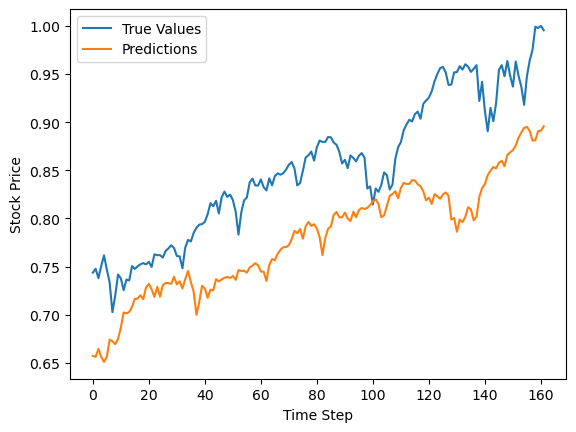

In [28]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

# Load the stock data
df = pd.read_csv('../price_universe.csv', index_col=0)
df.index = pd.to_datetime(price.index)
df = df.iloc[:, :1]

# Preprocess the data
scaler = MinMaxScaler()
df['S&P 500'] = scaler.fit_transform(df[['S&P 500']])

# Convert the data into a time series format
def create_time_series(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 30
data = df['S&P 500'].values
data = data.reshape(-1, 1)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[:train_size, :], data[train_size:, :]
X_train, y_train = create_time_series(train_data, look_back)
X_test, y_test = create_time_series(test_data, look_back)

# Convert the data into tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, (h_n, c_n) = self.lstm(x)
        x = self.fc(x[-1, :, :])
        return x

# Instantiate the model
input_size = 1
hidden_size = 128
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for i in range(X_train.size(0)):
        x = X_train[i].view(1, look_back, input_size)
        y = y_train[i].view(1, 1)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
        
import matplotlib.pyplot as plt

# Get the predictions
predictions = []
model.eval()
for i in range(len(X_test)):
    x = X_test[i].view(1, look_back, input_size)
    predictions.append(model(x).detach().numpy()[0, 0])

# Plot the predictions and the true values
plt.plot(y_test.numpy(), label='True Values')
plt.plot(predictions, label='Predictions')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.legend()

In [26]:

plt.show()

ValueError: only one element tensors can be converted to Python scalars